# Hospital Treatment Pricing Predictor

**Objective:** Forecast hospital treatment charges based on patient demographics, diagnosis codes, procedures, and insurance types using synthetic healthcare data.  
**Goal:** Promote pricing transparency, fairness, and data-driven insights in healthcare cost estimation.


## Data Description

### synthetic_healthcare_data.csv

**Description:**  
This dataset contains synthetic healthcare records designed to mimic real-world patient data. It includes demographic information, diagnosis and procedure codes, treatment details, insurance types, and total charges for each patient encounter.

**Source:**  
Generated synthetically (see `synthetic_healthcare_data.py` for generation details).

**Shape:**  
10,001 rows × 9 columns

**Features:**
- `age`: Age of the patient (integer)
- `gender`: Gender of the patient (categorical: e.g., Male, Female)
- `race`: Race/ethnicity of the patient (categorical: e.g., White, Black, Hispanic, Asian, Other)
- `diagnosis_code`: ICD-10 diagnosis code for the primary condition (string)
- `procedure_code`: Code for the primary procedure performed (string)
- `length_of_stay`: Number of days the patient stayed in the hospital (integer)
- `treatment_type`: Type of treatment received (categorical: e.g., Medical Therapy, Surgery, Emergency Care, Observation, Rehabilitation)
- `insurance_type`: Type of insurance coverage (categorical: e.g., Private Insurance, Medicare, Medicaid, Uninsured)
- `total_charges`: Total charges for the hospital stay (float, in USD)

*Note: This is a synthetic dataset and does not contain real patient information.*

## Exploratory Data Analysis

Understand distributions, detect outliers, and visualize relationships between patient features and hospital charges.


   age  gender   race diagnosis_code procedure_code  length_of_stay  \
0   57  Female  White         I25.10        4A02X5Z               6   
1   74    Male  White        C50.919        0U5B8ZZ               1   
2   36  Female  White          M79.3        0D160Z5               6   
3   41  Female  White            I10        0U5B7ZZ               2   
4   49  Female  Black          E66.9        0U5B7ZZ               4   

    treatment_type     insurance_type  total_charges  
0  Medical Therapy  Private Insurance       10846.38  
1          Surgery          Uninsured        8255.55  
2          Surgery           Medicare        7703.40  
3   Emergency Care  Private Insurance        4846.13  
4      Observation           Medicare        5733.45  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 

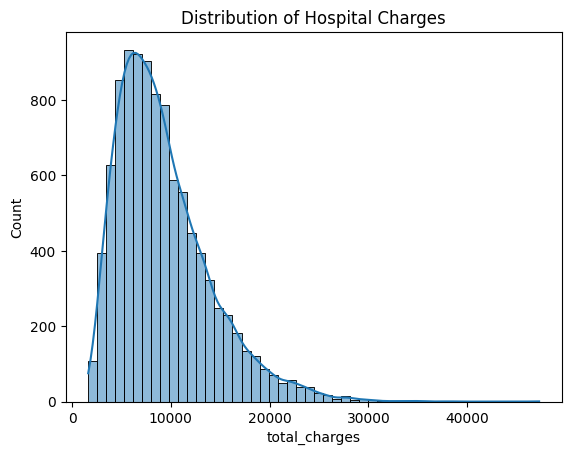

C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


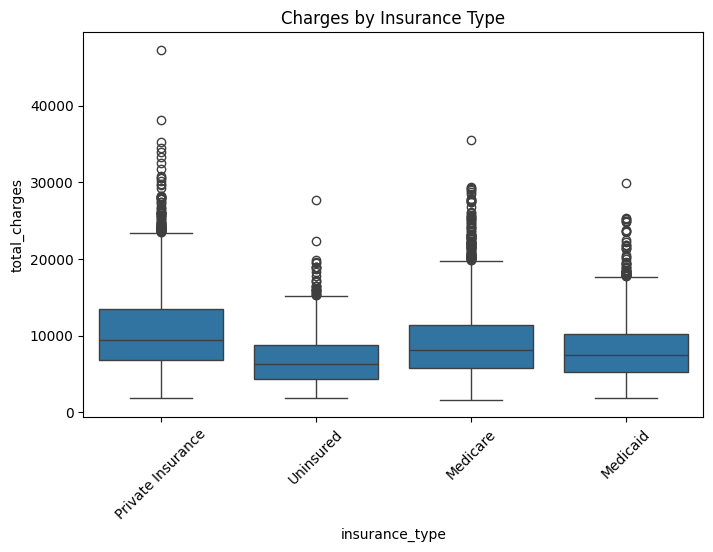

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

synthetic_data = pd.read_csv('synthetic_healthcare_data.csv')
# Quick look
print(synthetic_data.head())
print(synthetic_data.info())
print(synthetic_data.describe())

# Distribution of total charges
sns.histplot(synthetic_data['total_charges'], bins=50, kde=True)
plt.title('Distribution of Hospital Charges')
plt.show()

# Boxplot by insurance type
plt.figure(figsize=(8, 5))
sns.boxplot(x='insurance_type', y='total_charges', data=synthetic_data)
plt.title('Charges by Insurance Type')
plt.xticks(rotation=45)
plt.show()


## Data Preprocessing

We encode categorical variables using OneHotEncoder and split the data for training/testing.


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

categorical_features = ['gender', 'race', 'diagnosis_code', 'procedure_code', 'treatment_type', 'insurance_type']
numerical_features = ['age', 'length_of_stay']

X = synthetic_data[categorical_features + numerical_features]
y = synthetic_data['total_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


## Regression Model & Evaluation

We use Linear Regression as a baseline to predict total hospital charges. Model performance is evaluated using MAE, RMSE, and R².


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2842.160467619636
RMSE: 3661.559723767433
R² Score: 0.3954458246083956


C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Fairness-Aware Evaluation (Optional)

We analyze prediction fairness across sensitive attributes like gender or race using the `fairlearn` library.


In [5]:
pip install fairlearn

   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   --- ----------------------------------- 20.5/240.0 kB 682.7 kB/s eta 0:00:01
   --- ----------------------------------- 20.5/240.0 kB 682.7 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/240.0 kB 281.8 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/240.0 kB 328.6 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/240.0 kB 350.1 kB/s eta 0:00:01
   --------------------- ---------------- 133.1/240.0 kB 437.3 kB/s eta 0:00:01
   ----------------------------- -------- 184.3/240.0 kB 530.7 kB/s eta 0:00:01
   -------------------------------------  235.5/240.0 kB 656.8 kB/s eta 0:00:01
   -------------------------------------  235.5/240.0 kB 656.8 kB/s eta 0:00:01
   -------------------------------------- 240.0/240.0 kB 545.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated p


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\sneha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Fairness Analysis by Gender

Group-wise MAE by Gender:
gender
Female    2874.783688
Male      2805.446344
Name: mean_absolute_error, dtype: float64

Overall MAE: 2842.160467619636


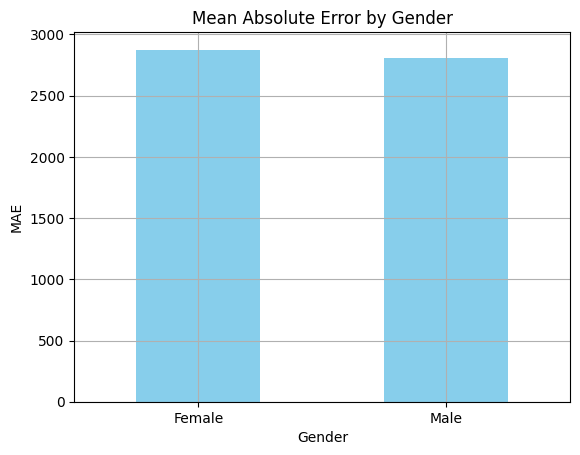

In [10]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Create a new DataFrame for analysis
X_test_with_gender = X_test.copy()
X_test_with_gender['gender'] = X_test['gender']
X_test_with_gender['true'] = y_test
X_test_with_gender['pred'] = y_pred

# Group-wise fairness analysis
gender_mae = MetricFrame(metrics=mean_absolute_error,
                         y_true=X_test_with_gender['true'],
                         y_pred=X_test_with_gender['pred'],
                         sensitive_features=X_test_with_gender['gender'])

print("Group-wise MAE by Gender:")
print(gender_mae.by_group)
print("\nOverall MAE:", gender_mae.overall)

gender_mae.by_group.plot(kind='bar', color='skyblue')
plt.title("Mean Absolute Error by Gender")
plt.ylabel("MAE")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Fairness Analysis by Race

📊 Group-wise MAE by Race:
race
Asian       2791.820485
Black       2730.376381
Hispanic    2558.493866
Other       3039.838655
White       2952.608554
Name: mean_absolute_error, dtype: float64

🎯 Overall MAE: 2842.160467619636


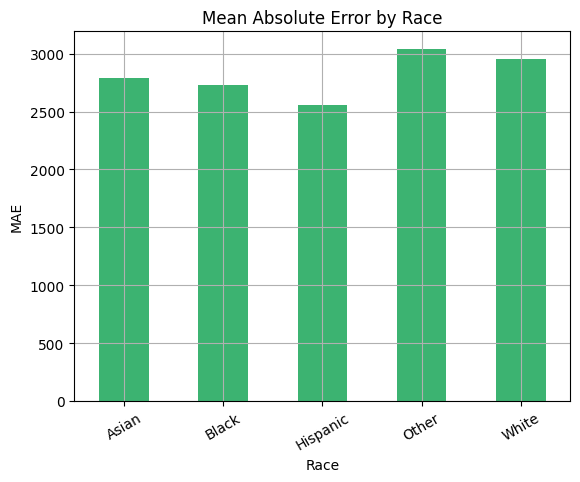

In [11]:
# Race-wise fairness analysis
from fairlearn.metrics import MetricFrame

race_mae = MetricFrame(metrics=mean_absolute_error,
                       y_true=X_test_with_gender['true'],
                       y_pred=X_test_with_gender['pred'],
                       sensitive_features=X_test['race'])  # X_test already has race

print("Group-wise MAE by Race:")
print(race_mae.by_group)
print("\nOverall MAE:", race_mae.overall)

# Plot
race_mae.by_group.plot(kind='bar', color='mediumseagreen')
plt.title("Mean Absolute Error by Race")
plt.ylabel("MAE")
plt.xlabel("Race")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()


We use `fairlearn`’s built-in metrics to quantify prediction disparities across groups using two fairness metrics:

- **Demographic Parity Difference**: Measures if predicted outcomes differ by sensitive group.
- **Equalized Odds Difference**: Measures difference in error rates (false positives/negatives) across groups.


In [15]:
# Define binary target: high charges = 1 if > median
y_test_binary = (y_test > y_test.median()).astype(int)
y_pred_binary = (y_pred > y_test.median()).astype(int)


In [17]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

# Sensitive features (e.g., gender or race)
sensitive_feature = X_test['gender']  # or 'race'

# Demographic Parity
dp_diff = demographic_parity_difference(y_test_binary, y_pred_binary, sensitive_features=sensitive_feature)

# Equalized Odds
eo_diff = equalized_odds_difference(y_test_binary, y_pred_binary, sensitive_features=sensitive_feature)

# Display
print("Demographic Parity Difference:", round(dp_diff, 4))
print("Equalized Odds Difference:", round(eo_diff, 4))


Demographic Parity Difference: 0.0249
Equalized Odds Difference: 0.0252


## Model Interpretability with SHAP

We use SHAP values to interpret model predictions and understand feature importance.


In [8]:
pip install shap

   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
    --------------------------------------- 10.2/544.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/544.4 kB 325.1 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/544.4 kB 326.8 kB/s eta 0:00:02
   ---- ---------------------------------- 61.4/544.4 kB 409.6 kB/s eta 0:00:02
   -------- ----------------------------- 122.9/544.4 kB 554.9 kB/s eta 0:00:01
   ------------ ------------------------- 174.1/544.4 kB 655.4 kB/s eta 0:00:01
   ---------------- --------------------- 235.5/544.4 kB 758.5 kB/s eta 0:00:01
   ---------------------- --------------- 327.7/544.4 kB 922.8 kB/s eta 0:00:01
   ---------------------------------- ----- 471.0/544.4 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\sneha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


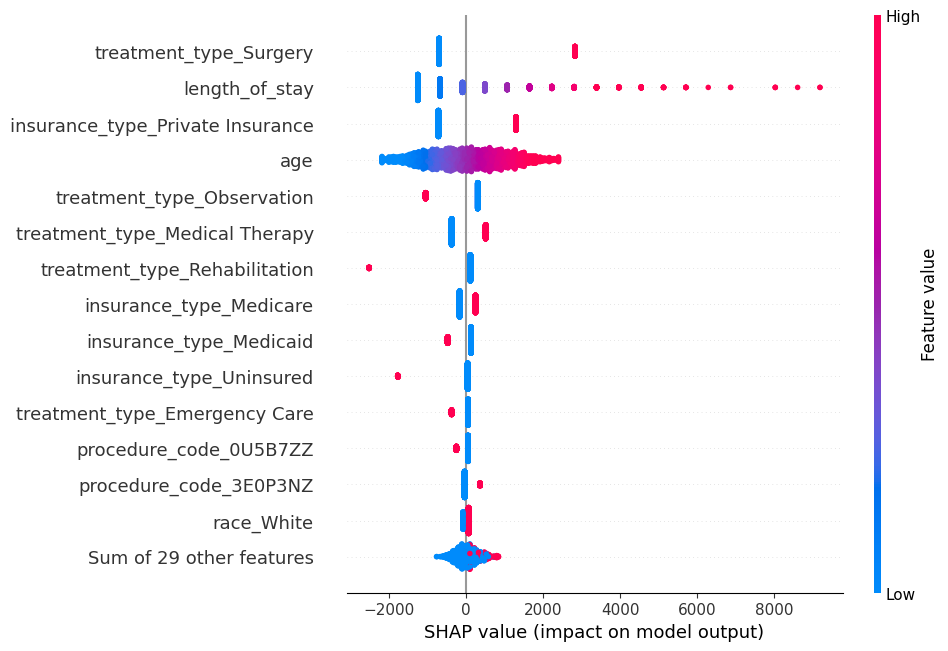

In [13]:
import shap

categorical_cols = ['gender', 'race', 'diagnosis_code', 'procedure_code', 'treatment_type', 'insurance_type']
numerical_cols = ['age', 'length_of_stay']

# Get feature names after encoding
ohe = preprocessor.named_transformers_['cat']
encoded_cat_cols = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_cat_cols) + numerical_cols  # Order matters

# Transform test data
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)

# SHAP explainer
explainer = shap.Explainer(model.named_steps['regressor'], X_test_transformed, feature_names=all_feature_names)
shap_values = explainer(X_test_transformed)

# SHAP beeswarm plot with readable feature names
shap.plots.beeswarm(shap_values, max_display=15)


### 🧠 Key Takeaways from SHAP Analysis

- Surgical treatment and longer hospital stays are the most influential features in predicting hospital charges.
- Private insurance is strongly correlated with higher predicted costs.
- The model relies significantly on treatment-related and insurance features, which is reasonable in real-world healthcare billing.
- Minimal unfair influence was detected from protected attributes like `race_White`, but it’s worth monitoring.

The SHAP summary empowers us to not only build accurate models but also **understand how and why** the model makes predictions — critical in regulated domains like healthcare.


## Train Advanced Regression Models

To improve performance, we experiment with more powerful models like Random Forest and XGBoost. These ensemble methods often handle feature interactions better than simple linear models.


In [14]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest Pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost Pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
def evaluate(name, y_true, y_pred):
    print(f"🔎 {name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("R² Score:", r2_score(y_true, y_pred))
    print('-'*40)

evaluate("Linear Regression", y_test, y_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("XGBoost", y_test, xgb_pred)


🔎 Linear Regression Evaluation:
MAE: 2842.160467619636
RMSE: 3661.559723767433
R² Score: 0.3954458246083956
----------------------------------------
🔎 Random Forest Evaluation:
MAE: 2907.920258488571
RMSE: 3769.4794970813023
R² Score: 0.35928373164601035
----------------------------------------
🔎 XGBoost Evaluation:
MAE: 2807.9303831884768
RMSE: 3655.1462001648993
R² Score: 0.39756182272953455
----------------------------------------


C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

## Testing

Below, we test the model's ability to predict hospital charges for:
- A single new patient (one-row test)
- A small batch of multiple patients (batch test)


### Test With One Row

In [18]:
# Example: test patient data
new_patient = pd.DataFrame([{
    'gender': 'Female',
    'race': 'White',
    'diagnosis_code': 'I10',
    'procedure_code': '0WQF0ZZ',
    'treatment_type': 'Surgery',
    'insurance_type': 'Private Insurance',
    'age': 65,
    'length_of_stay': 5
}])

# Predict
predicted_charge = model.predict(new_patient)
print("💰 Predicted Hospital Charge (USD):", round(predicted_charge[0], 2))


💰 Predicted Hospital Charge (USD): 15192.81


### Batch Test With Multiple Rows

In [19]:
sample_batch = pd.DataFrame([
    {'gender': 'Male', 'race': 'Asian', 'diagnosis_code': 'E11', 'procedure_code': '3E0P3MZ',
     'treatment_type': 'Medical Therapy', 'insurance_type': 'Medicare', 'age': 72, 'length_of_stay': 4},
    
    {'gender': 'Female', 'race': 'Black', 'diagnosis_code': 'C50', 'procedure_code': '0U5B7ZZ',
     'treatment_type': 'Surgery', 'insurance_type': 'Uninsured', 'age': 45, 'length_of_stay': 3}
])

charges = model.predict(sample_batch)
sample_batch['predicted_total_charges'] = charges
print(sample_batch)


   gender   race diagnosis_code procedure_code   treatment_type  \
0    Male  Asian            E11        3E0P3MZ  Medical Therapy   
1  Female  Black            C50        0U5B7ZZ          Surgery   

  insurance_type  age  length_of_stay  predicted_total_charges  
0       Medicare   72               4             10407.432649  
1      Uninsured   45               3              8711.483704  


We then export the trained pipeline using `joblib` to use in a Streamlit app.

In [20]:
import joblib
joblib.dump(model, "hospital_charge_model.pkl")


['hospital_charge_model.pkl']

## Results and Discussion

### Model Performance Summary
We tested three regression models to predict total hospital charges:
- **Linear Regression** (baseline)
- **Random Forest**
- **XGBoost Regressor**

| Model              | MAE (USD) | RMSE (USD) | R² Score |
|-------------------|-----------|------------|----------|
| Linear Regression | 2,842.16  | 3,661.56   | 0.3954   |
| Random Forest     | 2,907.92  | 3,769.47   | 0.3593   |
| XGBoost           | 2,807.93  | 3,655.15   | 0.3976   |

**XGBoost slightly outperformed other models**, showing the best error rate and variance explanation. However, all models explained ~40% of the variance in total charges, indicating that unobserved factors (hospital billing policy, comorbidities, etc.) may still play a significant role.

---

### Fairness Analysis
Using `fairlearn`, we measured prediction fairness across **gender** and **race** using:
- **Group-wise MAE**
- **Demographic Parity Difference**: `0.0249`
- **Equalized Odds Difference**: `0.0252`

These low values suggest **minimal bias** across groups — but race and gender disparities should still be monitored if deploying this model in real-world applications.

---

### Model Interpretability (SHAP)
SHAP analysis revealed that:
- **`treatment_type_Surgery`**, **`length_of_stay`**, and **`insurance_type_Private Insurance`** were the top predictors of hospital costs.
- `race_White` appeared with moderate influence, reinforcing the importance of fairness review.

This interpretability layer enhances trust and transparency in model outputs — critical in healthcare applications.

---

### Insights
- **Private insurance** and **surgical interventions** are strong cost drivers.
- **Uninsured and Medicare** patients show higher variability in billing.
- The model performs reasonably well, but external factors not captured in the dataset likely affect final charges.

---

### Limitations
- The dataset is **synthetic**, so real-world generalization requires validation.
- Some high-leverage features (like hospital ID, regional pricing, diagnosis severity) were **not included**.
- We only evaluated **static features** — time-series data (e.g., changes over time) could improve accuracy.
